## Not Hotdog! 
The 'Hello, World!' of computer vision.   

#### Goal
Learn the basics of PyTorch by making a model that predicts if motorboat, car or hotdog is in the picture.  
It's multi-class single-label classification.

#### Inspired from
[Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) tutorial and a [fictional App](https://everipedia.org/wiki/lang_en/not-hotdog-app/) from 'Silicon Valley'.

#### Data
Total of 231 photos of motorboats, cars and hotdogs.  
Downloaded from Google with [Google Images Downloader.](https://github.com/hardikvasa/google-images-download)

### Plan to train an image classifier

1. Get data, format to 3x64x64 (64x64 pixels with 3 colors, RGB)
2. Transform data to Tensors (similar to NumPy’s ndarrays + they can also be used on a GPU) and normalize (-1, 1).
3. Define a Convolutional Neural Network
4. Define a loss function
5. Train the network on the training data and tune parameters
6. Test the network on the test data  


In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

1.0.0


Before training I want to tranform my data: resize, convert to tensor and normalize

In [2]:
transform = transforms.Compose([transforms.Resize((64, 64)), 
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

Folders with images -> datasets

In [3]:
path = 'data/'
train_dataset = torchvision.datasets.ImageFolder(root=path + 'train/', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=path + 'test/', transform=transform)

How many pictures do I have?

In [4]:
classes = train_dataset.classes

def get_classes_dict(ds):
    dic = {classes[i]:0 for i in range(len(classes))}
    for _, idx in ds.imgs:
        label = classes[idx]
        dic[label] = dic[label] + 1
        
    return dic

print('Train datasets:', get_classes_dict(train_dataset))
print('Test datasets:', get_classes_dict(test_dataset))

Train datasets: {'boat': 58, 'car': 58, 'hotdog': 58}
Test datasets: {'boat': 19, 'car': 19, 'hotdog': 19}


datasest -> data loaders (for training)

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=3, num_workers=2, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=3, num_workers=2, shuffle=True)

Show some of the training images

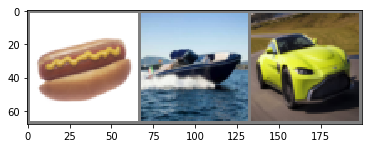

['hotdog', 'boat', 'car']


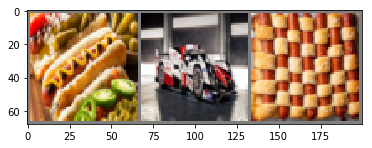

['hotdog', 'car', 'hotdog']


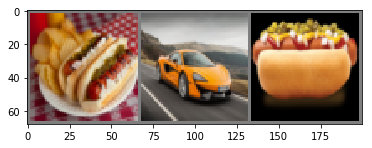

['hotdog', 'car', 'hotdog']


In [6]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for i in range(3):
    # get some random training images
    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    
    # Images with true labels
    imshow(torchvision.utils.make_grid(images))
    print([classes[labels[j]] for j in range(3)])

Build CNN

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 12, 5)
        self.conv3 = nn.Conv2d(12, 16, 4)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 12)
        self.fc4 = nn.Linear(12, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

Loss function

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()


Train the network

In [9]:
def train(epochs, optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)):
    for epoch in range(epochs):
        running_loss = 0.0

        for i, data in enumerate(train_loader, 0):
            # get 3 images and their labels
            inputs, labels = data
            # have to be manually set to zero or else they accumulate
            optimizer.zero_grad()
            # forward
            outputs = net(inputs)        
            # loss
            loss = criterion(outputs, labels)        
            # backward
            loss.backward()      
            # optimize
            optimizer.step()
            # print statistics at the end of epoch
            running_loss += loss.item()
            #if i == 57 and epoch == epochs -1:   
            if i == 57:   
                print(f'Epoch {epoch + 1}, loss: {round(running_loss / 58, 4)}')
                running_loss = 0.0

    print('Finished Training\n\n')

In [10]:
train(10, optim.SGD(net.parameters(), lr=0.01, momentum=0.5))
train(10, optim.SGD(net.parameters(), lr=0.03, momentum=0.5))
train(10, optim.SGD(net.parameters(), lr=0.001, momentum=0.5))
train(10, optim.SGD(net.parameters(), lr=0.0003, momentum=0.5))
train(10, optim.SGD(net.parameters(), lr=0.0001, momentum=0.5))

Epoch 1, loss: 1.1091
Epoch 2, loss: 1.1009
Epoch 3, loss: 1.0968
Epoch 4, loss: 1.089
Epoch 5, loss: 1.0683
Epoch 6, loss: 0.9467
Epoch 7, loss: 0.805
Epoch 8, loss: 0.7713
Epoch 9, loss: 0.6184
Epoch 10, loss: 0.5842
Finished Training


Epoch 1, loss: 0.8476
Epoch 2, loss: 0.84
Epoch 3, loss: 0.7933
Epoch 4, loss: 0.6943
Epoch 5, loss: 0.6904
Epoch 6, loss: 0.5862
Epoch 7, loss: 0.602
Epoch 8, loss: 0.709
Epoch 9, loss: 0.5631
Epoch 10, loss: 0.6758
Finished Training


Epoch 1, loss: 0.5698
Epoch 2, loss: 0.4675
Epoch 3, loss: 0.4428
Epoch 4, loss: 0.4178
Epoch 5, loss: 0.3979
Epoch 6, loss: 0.379
Epoch 7, loss: 0.3652
Epoch 8, loss: 0.3505
Epoch 9, loss: 0.3388
Epoch 10, loss: 0.3325
Finished Training


Epoch 1, loss: 0.3134
Epoch 2, loss: 0.3093
Epoch 3, loss: 0.3067
Epoch 4, loss: 0.3028
Epoch 5, loss: 0.3013
Epoch 6, loss: 0.2969
Epoch 7, loss: 0.2941
Epoch 8, loss: 0.2905
Epoch 9, loss: 0.2887
Epoch 10, loss: 0.2867
Finished Training


Epoch 1, loss: 0.2795
Epoch 2, loss: 0.2785

Display images from the test set

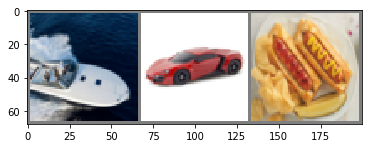

True labels:  ['boat', 'car', 'hotdog']
Predicted labels:  ['hotdog', 'car', 'hotdog']


In [11]:
# predict
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# show images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print labels
imshow(torchvision.utils.make_grid(images))
print('True labels: ', [classes[labels[j]] for j in range(3)])
print('Predicted labels: ', [classes[predicted[j]] for j in range(3)])

How the network performs on the whole dataset

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {round((100 * correct / total))}%')

Accuracy: 89%


Accuracy per class

In [13]:
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if (len(labels) == 3):
            for i in range(3):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(3):
    print(f'Accuracy of {classes[i]}: {round(100 * class_correct[i] / class_total[i])}%')

Accuracy of boat: 84%
Accuracy of car: 84%
Accuracy of hotdog: 100%
